## Pandas教程
pandas是一个专门用于数据分析的python工具库

### Pandas简介
* python数据分析处理的一个package
* 基于numpy(对“矩阵”做科学计算)
* 有一种用python去操作Excel/SQL的感觉

### 目录
* series
* DataFrame
* Index
* csv文件读写

### 数据结构Series

In [1]:
import numpy as np
import pandas as pd

#### 构造和初始化series

In [2]:
s = pd.Series([7, 'Beijing', 3.14, -12345, 'HanXiaoyang'])

In [3]:
s[1]

'Beijing'

In [4]:
s

0              7
1        Beijing
2           3.14
3         -12345
4    HanXiaoyang
dtype: object

pandas会默认用0到n作为Series的index，但是我们也可以自己指定index。index可以类比理解为dic当中的key。

In [5]:
s = pd.Series([7, 'Beijing', 3.14, -12345, 'HanXiaoyang'], index=['A', 'B', 'C', 'D', 'E'])

In [6]:
s

A              7
B        Beijing
C           3.14
D         -12345
E    HanXiaoyang
dtype: object

In [7]:
s['A']

7

In [8]:
s[ ['A','D','B'] ]

A          7
D     -12345
B    Beijing
dtype: object

我们可以用list来构建Series，同时可以指定index。实际上我们还可以用dic来初始化Series，因为Series本来就是key-value的结构。

In [51]:
cities = {'Beijing':55000, 'ShangHai':60000, 'Shenzhen':50000, 'Hangzhou':30000, 'Guangzhou':40000, 'Suzhou':None}

In [52]:
cities

{'Beijing': 55000,
 'Guangzhou': 40000,
 'Hangzhou': 30000,
 'ShangHai': 60000,
 'Shenzhen': 50000,
 'Suzhou': None}

In [53]:
apt = pd.Series(cities, name='income')

In [14]:
apt

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     30000.0
ShangHai     60000.0
Shenzhen     50000.0
Suzhou           NaN
Name: income, dtype: float64

In [15]:
# 索引
apt['Guangzhou']

40000.0

In [16]:
apt[1]

40000.0

In [17]:
apt[1:]

Guangzhou    40000.0
Hangzhou     30000.0
ShangHai     60000.0
Shenzhen     50000.0
Suzhou           NaN
Name: income, dtype: float64

In [18]:
apt[:-1]

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     30000.0
ShangHai     60000.0
Shenzhen     50000.0
Name: income, dtype: float64

In [19]:
apt[[3,4,1]]

ShangHai     60000.0
Shenzhen     50000.0
Guangzhou    40000.0
Name: income, dtype: float64

In [20]:
apt[ ['ShangHai', 'Shenzhen', 'Guangzhou'] ]

ShangHai     60000.0
Shenzhen     50000.0
Guangzhou    40000.0
Name: income, dtype: float64

In [21]:
# 简单的计算
# 广播特性
3*apt

Beijing      165000.0
Guangzhou    120000.0
Hangzhou      90000.0
ShangHai     180000.0
Shenzhen     150000.0
Suzhou            NaN
Name: income, dtype: float64

In [22]:
apt/2.5

Beijing      22000.0
Guangzhou    16000.0
Hangzhou     12000.0
ShangHai     24000.0
Shenzhen     20000.0
Suzhou           NaN
Name: income, dtype: float64

In [23]:
# list不可以直接做数学运算
my_list = [2,4,6,8,10]

In [24]:
my_list/2

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [25]:
apt[1:]

Guangzhou    40000.0
Hangzhou     30000.0
ShangHai     60000.0
Shenzhen     50000.0
Suzhou           NaN
Name: income, dtype: float64

In [26]:
apt[:-1]

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     30000.0
ShangHai     60000.0
Shenzhen     50000.0
Name: income, dtype: float64

In [27]:
# 基于索引去做计算的
apt[1:] + apt[:-1]

Beijing           NaN
Guangzhou     80000.0
Hangzhou      60000.0
ShangHai     120000.0
Shenzhen     100000.0
Suzhou            NaN
Name: income, dtype: float64

In [28]:
# in判断index是否存在
'Hangzhou' in apt

True

In [29]:
'Chongqing' in apt

False

In [32]:
# apt['Chongqing'] 不OK的
print(apt.get('Chongqing'))

None


In [33]:
print(apt.get('Guangzhou'))

40000.0


##### booling indexing/条件判断索引

In [34]:
apt>=40000

Beijing       True
Guangzhou     True
Hangzhou     False
ShangHai      True
Shenzhen      True
Suzhou       False
Name: income, dtype: bool

In [35]:
#条件索引
apt[apt>=40000]

Beijing      55000.0
Guangzhou    40000.0
ShangHai     60000.0
Shenzhen     50000.0
Name: income, dtype: float64

In [36]:
# 统计计算
apt.mean()

47000.0

In [37]:
apt.median()

50000.0

In [38]:
apt.max()

60000.0

In [39]:
apt.min()

30000.0

#### Series赋值

In [40]:
apt

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     30000.0
ShangHai     60000.0
Shenzhen     50000.0
Suzhou           NaN
Name: income, dtype: float64

In [54]:
apt['Shenzhen'] = 70000

In [55]:
apt

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     30000.0
ShangHai     60000.0
Shenzhen     70000.0
Suzhou           NaN
Name: income, dtype: float64

In [56]:
#条件赋值
apt[apt<=40000] = 45000

In [57]:
apt

Beijing      55000.0
Guangzhou    45000.0
Hangzhou     45000.0
ShangHai     60000.0
Shenzhen     70000.0
Suzhou           NaN
Name: income, dtype: float64

In [48]:
type(apt)

pandas.core.series.Series

In [58]:
#更多高级的数学运算
np.log(apt)

Beijing      10.915088
Guangzhou    10.714418
Hangzhou     10.714418
ShangHai     11.002100
Shenzhen     11.156251
Suzhou             NaN
Name: income, dtype: float64

In [59]:
cars = pd.Series({'Beijing':350000, 'ShangHai':400000, 'Shenzhen':300000, \
                 'Tianjin':200000, 'Guangzhou':250000, 'Chongqing':150000
                 })

In [60]:
cars

Beijing      350000
Chongqing    150000
Guangzhou    250000
ShangHai     400000
Shenzhen     300000
Tianjin      200000
dtype: int64

In [61]:
expense = cars + 10*apt

In [62]:
expense

Beijing       900000.0
Chongqing          NaN
Guangzhou     700000.0
Hangzhou           NaN
ShangHai     1000000.0
Shenzhen     1000000.0
Suzhou             NaN
Tianjin            NaN
dtype: float64

#### 数据缺失

In [63]:
'Hangzhou' in apt

True

In [64]:
'Hangzhou' in cars

False

In [65]:
apt

Beijing      55000.0
Guangzhou    45000.0
Hangzhou     45000.0
ShangHai     60000.0
Shenzhen     70000.0
Suzhou           NaN
Name: income, dtype: float64

In [66]:
# bool结果返回
apt.notnull()

Beijing       True
Guangzhou     True
Hangzhou      True
ShangHai      True
Shenzhen      True
Suzhou       False
Name: income, dtype: bool

In [67]:
apt.isnull()

Beijing      False
Guangzhou    False
Hangzhou     False
ShangHai     False
Shenzhen     False
Suzhou        True
Name: income, dtype: bool

In [68]:
expense

Beijing       900000.0
Chongqing          NaN
Guangzhou     700000.0
Hangzhou           NaN
ShangHai     1000000.0
Shenzhen     1000000.0
Suzhou             NaN
Tianjin            NaN
dtype: float64

In [69]:
expense[expense.isnull()] = expense.mean()

In [70]:
expense

Beijing       900000.0
Chongqing     900000.0
Guangzhou     700000.0
Hangzhou      900000.0
ShangHai     1000000.0
Shenzhen     1000000.0
Suzhou        900000.0
Tianjin       900000.0
dtype: float64

### 数据结构DataFrame
一个DataFrame就是一张表格，Series是一维数组，DataFrame是二维数组。可以类比成office当中的excel，也可以理解成多个Series的集合。

In [71]:
data = {'City':['Beijing','ShangHai','Guangzhou','Shenzhen','Hangzhou','Chongqing'],
        'year':[2017,2018,2017,2018,2017,2017],
        'population':[2100,2300,1000,700,500,500]
       }

In [72]:
pd.DataFrame(data)

,City,population,year
0,Beijing,2100,2017
1,ShangHai,2300,2018
2,Guangzhou,1000,2017
3,Shenzhen,700,2018
4,Hangzhou,500,2017
5,Chongqing,500,2017


In [73]:
pd.DataFrame(data, columns=['year','City','population'])

,year,City,population
0,2017,Beijing,2100
1,2018,ShangHai,2300
2,2017,Guangzhou,1000
3,2018,Shenzhen,700
4,2017,Hangzhou,500
5,2017,Chongqing,500


In [74]:
# index
pd.DataFrame(data, columns=['year','City','population'], index=['one','two','three','four','five','six'])

,year,City,population
one,2017,Beijing,2100
two,2018,ShangHai,2300
three,2017,Guangzhou,1000
four,2018,Shenzhen,700
five,2017,Hangzhou,500
six,2017,Chongqing,500


In [75]:
# DataFrame可以视作Series的集合
apt

Beijing      55000.0
Guangzhou    45000.0
Hangzhou     45000.0
ShangHai     60000.0
Shenzhen     70000.0
Suzhou           NaN
Name: income, dtype: float64

In [76]:
cars

Beijing      350000
Chongqing    150000
Guangzhou    250000
ShangHai     400000
Shenzhen     300000
Tianjin      200000
dtype: int64

In [77]:
df = pd.DataFrame({'apt':apt, 'cars':cars})

In [78]:
df

,apt,cars
Beijing,55000.0,350000.0
Chongqing,NaN,150000.0
Guangzhou,45000.0,250000.0
Hangzhou,45000.0,NaN
ShangHai,60000.0,400000.0
Shenzhen,70000.0,300000.0
Suzhou,NaN,NaN
Tianjin,NaN,200000.0


In [79]:
# 取出一列(Series)
df['apt']

Beijing      55000.0
Chongqing        NaN
Guangzhou    45000.0
Hangzhou     45000.0
ShangHai     60000.0
Shenzhen     70000.0
Suzhou           NaN
Tianjin          NaN
Name: apt, dtype: float64

In [80]:
type(df['apt'])

pandas.core.series.Series

In [81]:
df[['apt']]

,apt
Beijing,55000.0
Chongqing,NaN
Guangzhou,45000.0
Hangzhou,45000.0
ShangHai,60000.0
Shenzhen,70000.0
Suzhou,NaN
Tianjin,NaN


In [82]:
type(df[['apt']])

pandas.core.frame.DataFrame

In [83]:
# 赋值
df

,apt,cars
Beijing,55000.0,350000.0
Chongqing,NaN,150000.0
Guangzhou,45000.0,250000.0
Hangzhou,45000.0,NaN
ShangHai,60000.0,400000.0
Shenzhen,70000.0,300000.0
Suzhou,NaN,NaN
Tianjin,NaN,200000.0


In [84]:
df['bonus'] = 40000

In [85]:
df

,apt,cars,bonus
Beijing,55000.0,350000.0,40000
Chongqing,NaN,150000.0,40000
Guangzhou,45000.0,250000.0,40000
Hangzhou,45000.0,NaN,40000
ShangHai,60000.0,400000.0,40000
Shenzhen,70000.0,300000.0,40000
Suzhou,NaN,NaN,40000
Tianjin,NaN,200000.0,40000


In [86]:
# 对两列做计算
df['expense'] = df['apt'] + df['bonus']

In [87]:
df

,apt,cars,bonus,expense
Beijing,55000.0,350000.0,40000,95000.0
Chongqing,NaN,150000.0,40000,NaN
Guangzhou,45000.0,250000.0,40000,85000.0
Hangzhou,45000.0,NaN,40000,85000.0
ShangHai,60000.0,400000.0,40000,100000.0
Shenzhen,70000.0,300000.0,40000,110000.0
Suzhou,NaN,NaN,40000,NaN
Tianjin,NaN,200000.0,40000,NaN


In [88]:
df.index

Index(['Beijing', 'Chongqing', 'Guangzhou', 'Hangzhou', 'ShangHai', 'Shenzhen',
       'Suzhou', 'Tianjin'],
      dtype='object')

In [89]:
df.loc['Beijing']

apt         55000.0
cars       350000.0
bonus       40000.0
expense     95000.0
Name: Beijing, dtype: float64

In [90]:
type(df.loc['Beijing'])

pandas.core.series.Series

In [91]:
df.loc[['Beijing', 'ShangHai', 'Guangzhou']]

,apt,cars,bonus,expense
Beijing,55000.0,350000.0,40000,95000.0
ShangHai,60000.0,400000.0,40000,100000.0
Guangzhou,45000.0,250000.0,40000,85000.0


In [92]:
df

,apt,cars,bonus,expense
Beijing,55000.0,350000.0,40000,95000.0
Chongqing,NaN,150000.0,40000,NaN
Guangzhou,45000.0,250000.0,40000,85000.0
Hangzhou,45000.0,NaN,40000,85000.0
ShangHai,60000.0,400000.0,40000,100000.0
Shenzhen,70000.0,300000.0,40000,110000.0
Suzhou,NaN,NaN,40000,NaN
Tianjin,NaN,200000.0,40000,NaN


In [93]:
# 高级函数loc
df.loc['Beijing':'Suzhou', ['apt','bonus']]

,apt,bonus
Beijing,55000.0,40000
Chongqing,NaN,40000
Guangzhou,45000.0,40000
Hangzhou,45000.0,40000
ShangHai,60000.0,40000
Shenzhen,70000.0,40000
Suzhou,NaN,40000


In [94]:
# 类似切片的用法
df.loc['Beijing':'Suzhou', 'apt':'bonus']

,apt,cars,bonus
Beijing,55000.0,350000.0,40000
Chongqing,NaN,150000.0,40000
Guangzhou,45000.0,250000.0,40000
Hangzhou,45000.0,NaN,40000
ShangHai,60000.0,400000.0,40000
Shenzhen,70000.0,300000.0,40000
Suzhou,NaN,NaN,40000


In [95]:
# 传入list的用法
df.loc[['Beijing','Suzhou'], ['apt','bonus']]

,apt,bonus
Beijing,55000.0,40000
Suzhou,NaN,40000


In [96]:
df

,apt,cars,bonus,expense
Beijing,55000.0,350000.0,40000,95000.0
Chongqing,NaN,150000.0,40000,NaN
Guangzhou,45000.0,250000.0,40000,85000.0
Hangzhou,45000.0,NaN,40000,85000.0
ShangHai,60000.0,400000.0,40000,100000.0
Shenzhen,70000.0,300000.0,40000,110000.0
Suzhou,NaN,NaN,40000,NaN
Tianjin,NaN,200000.0,40000,NaN


In [97]:
df.loc['Beijing','bonus'] = 50000

In [98]:
df

,apt,cars,bonus,expense
Beijing,55000.0,350000.0,50000,95000.0
Chongqing,NaN,150000.0,40000,NaN
Guangzhou,45000.0,250000.0,40000,85000.0
Hangzhou,45000.0,NaN,40000,85000.0
ShangHai,60000.0,400000.0,40000,100000.0
Shenzhen,70000.0,300000.0,40000,110000.0
Suzhou,NaN,NaN,40000,NaN
Tianjin,NaN,200000.0,40000,NaN


In [99]:
#对列赋值
df.loc[:,'expense'] = 100000

In [100]:
df

,apt,cars,bonus,expense
Beijing,55000.0,350000.0,50000,100000
Chongqing,NaN,150000.0,40000,100000
Guangzhou,45000.0,250000.0,40000,100000
Hangzhou,45000.0,NaN,40000,100000
ShangHai,60000.0,400000.0,40000,100000
Shenzhen,70000.0,300000.0,40000,100000
Suzhou,NaN,NaN,40000,100000
Tianjin,NaN,200000.0,40000,100000


In [101]:
df.shape

(8, 4)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Beijing to Tianjin
Data columns (total 4 columns):
apt        5 non-null float64
cars       6 non-null float64
bonus      8 non-null int64
expense    8 non-null int64
dtypes: float64(2), int64(2)
memory usage: 320.0+ bytes


In [103]:
df.T

,Beijing,Chongqing,Guangzhou,Hangzhou,ShangHai,Shenzhen,Suzhou,Tianjin
apt,55000.0,NaN,45000.0,45000.0,60000.0,70000.0,NaN,NaN
cars,350000.0,150000.0,250000.0,NaN,400000.0,300000.0,NaN,200000.0
bonus,50000.0,40000.0,40000.0,40000.0,40000.0,40000.0,40000.0,40000.0
expense,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0


In [104]:
df

,apt,cars,bonus,expense
Beijing,55000.0,350000.0,50000,100000
Chongqing,NaN,150000.0,40000,100000
Guangzhou,45000.0,250000.0,40000,100000
Hangzhou,45000.0,NaN,40000,100000
ShangHai,60000.0,400000.0,40000,100000
Shenzhen,70000.0,300000.0,40000,100000
Suzhou,NaN,NaN,40000,100000
Tianjin,NaN,200000.0,40000,100000


In [105]:
df.describe()

,apt,cars,bonus,expense
count,5.000000,6.000000,8.000000,8.0
mean,55000.000000,275000.000000,41250.000000,100000.0
std,10606.601718,93541.434669,3535.533906,0.0
min,45000.000000,150000.000000,40000.000000,100000.0
25%,45000.000000,212500.000000,40000.000000,100000.0
50%,55000.000000,275000.000000,40000.000000,100000.0
75%,60000.000000,337500.000000,40000.000000,100000.0
max,70000.000000,400000.000000,50000.000000,100000.0


In [106]:
df['cars']

Beijing      350000.0
Chongqing    150000.0
Guangzhou    250000.0
Hangzhou          NaN
ShangHai     400000.0
Shenzhen     300000.0
Suzhou            NaN
Tianjin      200000.0
Name: cars, dtype: float64

In [107]:
df['cars'] < 310000

Beijing      False
Chongqing     True
Guangzhou     True
Hangzhou     False
ShangHai     False
Shenzhen      True
Suzhou       False
Tianjin       True
Name: cars, dtype: bool

In [109]:
df.loc[:,'color'] = ['红','黄','紫','蓝','红','绿','棕','橙']

In [110]:
df

,apt,cars,bonus,expense,color
Beijing,55000.0,350000.0,50000,100000,红
Chongqing,NaN,150000.0,40000,100000,黄
Guangzhou,45000.0,250000.0,40000,100000,紫
Hangzhou,45000.0,NaN,40000,100000,蓝
ShangHai,60000.0,400000.0,40000,100000,红
Shenzhen,70000.0,300000.0,40000,100000,绿
Suzhou,NaN,NaN,40000,100000,棕
Tianjin,NaN,200000.0,40000,100000,橙


In [111]:
df['color'].isin(['红','绿'])

Beijing       True
Chongqing    False
Guangzhou    False
Hangzhou     False
ShangHai      True
Shenzhen      True
Suzhou       False
Tianjin      False
Name: color, dtype: bool

In [112]:
df

,apt,cars,bonus,expense,color
Beijing,55000.0,350000.0,50000,100000,红
Chongqing,NaN,150000.0,40000,100000,黄
Guangzhou,45000.0,250000.0,40000,100000,紫
Hangzhou,45000.0,NaN,40000,100000,蓝
ShangHai,60000.0,400000.0,40000,100000,红
Shenzhen,70000.0,300000.0,40000,100000,绿
Suzhou,NaN,NaN,40000,100000,棕
Tianjin,NaN,200000.0,40000,100000,橙


In [113]:
# 填充缺失值
df.fillna(value=50000)
#df.fillna(value=50000, inplace=True)

,apt,cars,bonus,expense,color
Beijing,55000.0,350000.0,50000,100000,红
Chongqing,50000.0,150000.0,40000,100000,黄
Guangzhou,45000.0,250000.0,40000,100000,紫
Hangzhou,45000.0,50000.0,40000,100000,蓝
ShangHai,60000.0,400000.0,40000,100000,红
Shenzhen,70000.0,300000.0,40000,100000,绿
Suzhou,50000.0,50000.0,40000,100000,棕
Tianjin,50000.0,200000.0,40000,100000,橙


In [114]:
df

,apt,cars,bonus,expense,color
Beijing,55000.0,350000.0,50000,100000,红
Chongqing,NaN,150000.0,40000,100000,黄
Guangzhou,45000.0,250000.0,40000,100000,紫
Hangzhou,45000.0,NaN,40000,100000,蓝
ShangHai,60000.0,400000.0,40000,100000,红
Shenzhen,70000.0,300000.0,40000,100000,绿
Suzhou,NaN,NaN,40000,100000,棕
Tianjin,NaN,200000.0,40000,100000,橙


In [115]:
#向前填充
df.fillna(method='ffill')

,apt,cars,bonus,expense,color
Beijing,55000.0,350000.0,50000,100000,红
Chongqing,55000.0,150000.0,40000,100000,黄
Guangzhou,45000.0,250000.0,40000,100000,紫
Hangzhou,45000.0,250000.0,40000,100000,蓝
ShangHai,60000.0,400000.0,40000,100000,红
Shenzhen,70000.0,300000.0,40000,100000,绿
Suzhou,70000.0,300000.0,40000,100000,棕
Tianjin,70000.0,200000.0,40000,100000,橙


In [116]:
#向后填充
df.fillna(method='bfill')

,apt,cars,bonus,expense,color
Beijing,55000.0,350000.0,50000,100000,红
Chongqing,45000.0,150000.0,40000,100000,黄
Guangzhou,45000.0,250000.0,40000,100000,紫
Hangzhou,45000.0,400000.0,40000,100000,蓝
ShangHai,60000.0,400000.0,40000,100000,红
Shenzhen,70000.0,300000.0,40000,100000,绿
Suzhou,NaN,200000.0,40000,100000,棕
Tianjin,NaN,200000.0,40000,100000,橙


In [117]:
!head -10 data/GOOG.csv

Date,Open,High,Low,Close,Adj Close,Volume
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128600
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241200
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221400
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941200


In [119]:
goog = pd.read_csv('data/GOOG.csv', index_col=0, parse_dates=['Date'])

In [120]:
#前5行
goog.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [122]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3253 entries, 2004-08-19 to 2017-07-20
Data columns (total 6 columns):
Open         3253 non-null float64
High         3253 non-null float64
Low          3253 non-null float64
Close        3253 non-null float64
Adj Close    3253 non-null float64
Volume       3253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 177.9 KB


In [123]:
goog.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3.253000e+03
mean,370.588678,373.854568,366.959060,370.463274,370.463274,8.139070e+06
std,212.537536,213.645163,211.213609,212.542226,212.542226,8.403870e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.900000e+03
25%,225.928162,228.050217,222.984207,224.986694,224.986694,2.743600e+06
50%,292.030396,293.898407,288.538483,291.318054,291.318054,5.374600e+06
75%,531.599976,535.729126,527.810913,532.299988,532.299988,1.081150e+07
max,984.500000,988.250000,977.200012,983.679993,983.679993,8.254150e+07


In [124]:
goog.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-14,952.000000,956.909973,948.005005,955.989990,955.989990,1053800
2017-07-17,957.000000,960.739990,949.241028,953.419983,953.419983,1165500
2017-07-18,953.000000,968.039978,950.599976,965.400024,965.400024,1154000
2017-07-19,967.840027,973.039978,964.030029,970.890015,970.890015,1224500
2017-07-20,975.000000,975.900024,961.510010,968.150024,968.150024,1616500


In [125]:
goog.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=3253, freq=None)

In [126]:
goog.loc[:,'dow'] = goog.index.dayofweek

In [127]:
goog

,Open,High,Low,Close,Adj Close,Volume,dow
Date,,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800,4
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800,0
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700,1
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100,2
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128600,3
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241200,4
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221400,0
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941200,1


In [128]:
goog.loc[:,'doy'] = goog.index.dayofyear

In [129]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume,dow,doy
Date,,,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300,3,232
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800,4,233
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800,0,236
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700,1,237
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100,2,238


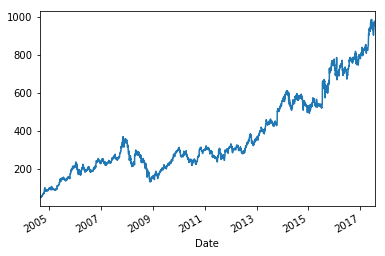

In [131]:
%matplotlib inline
goog['Open'].plot()

In [132]:
nvda = pd.read_csv('data/NVDA.csv', index_col=0, parse_dates=['Date'])

In [133]:
nvda.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000
1999-01-29,1.661458,1.666667,1.583333,1.583333,1.470231,6100800
1999-02-01,1.583333,1.625000,1.583333,1.614583,1.499249,3867600
1999-02-02,1.583333,1.625000,1.442708,1.489583,1.383178,6602400
1999-02-03,1.468750,1.541667,1.458333,1.520833,1.412196,1878000


In [134]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4654 entries, 1999-01-22 to 2017-07-20
Data columns (total 6 columns):
Open         4654 non-null float64
High         4654 non-null float64
Low          4654 non-null float64
Close        4654 non-null float64
Adj Close    4654 non-null float64
Volume       4654 non-null int64
dtypes: float64(5), int64(1)
memory usage: 254.5 KB


In [135]:
nvda.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4.654000e+03
mean,18.872888,19.222090,18.513574,18.879564,18.091126,1.632563e+07
std,22.025278,22.346668,21.662627,22.048935,22.093697,1.204002e+07
min,1.395833,1.421875,1.333333,1.364583,1.267107,4.920000e+05
25%,8.510000,8.755000,8.245261,8.505000,7.897462,8.721475e+06
50%,13.810000,14.090000,13.500000,13.814167,12.832797,1.373830e+07
75%,19.770000,20.129999,19.505000,19.789167,18.774976,2.041408e+07
max,166.330002,168.500000,164.610001,167.500000,167.500000,2.307714e+08


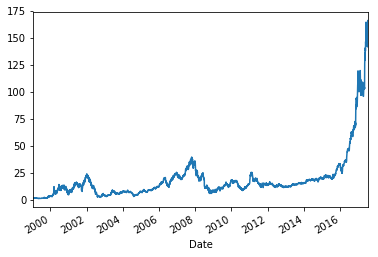

In [136]:
%matplotlib inline
nvda['Open'].plot()

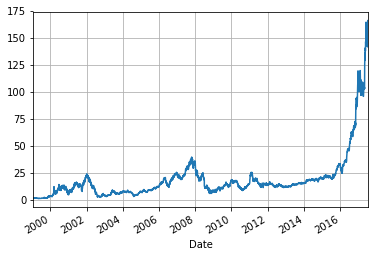

In [137]:
nvda['Open'].plot(grid=True)

In [139]:
nvda.index > '2016-01-01'

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [140]:
nvda.index < '2016-04-01'

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [145]:
# 条件与或非
# | 表示或
# & 表示且
# ! 表示非
(nvda.index > '2016-01-01') & (nvda.index < '2016-02-01')

array([False, False, False, ..., False, False, False], dtype=bool)

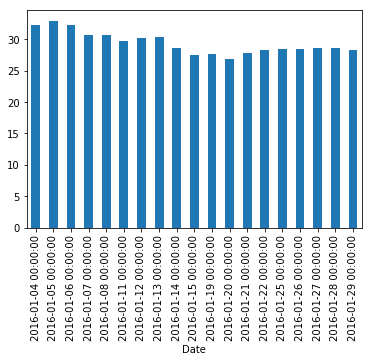

In [146]:
nvda[(nvda.index > '2016-01-01') & (nvda.index < '2016-02-01')]['Open'].plot(kind='bar')

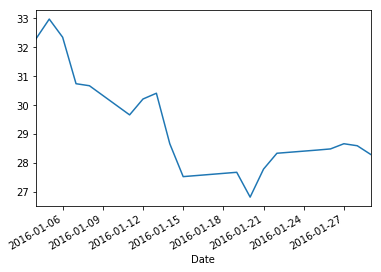

In [147]:
nvda[(nvda.index > '2016-01-01') & (nvda.index < '2016-02-01')]['Open'].plot()

In [148]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [149]:
nvda['Open'].mean()

18.87288806854319

In [150]:
nvda[['Open','High']].mean()

Open    18.872888
High    19.222090
dtype: float64

In [151]:
nvda[(nvda.index >= '2016-01-01') & (nvda.index <= '2016-06-30')].describe()

,Open,High,Low,Close,Adj Close,Volume
count,125.000000,125.000000,125.000000,125.000000,125.000000,1.250000e+02
mean,35.931360,36.416000,35.498880,36.006720,35.705421,9.802855e+06
std,6.722128,6.771410,6.768863,6.798316,6.816078,5.527803e+06
min,24.780001,25.559999,24.750000,25.219999,24.922132,4.382600e+06
25%,31.270000,31.870001,30.820000,31.520000,31.147726,6.919400e+06
50%,35.299999,35.570000,34.840000,35.389999,35.099426,8.707300e+06
75%,42.000000,42.799999,41.459999,42.279999,41.932854,1.122720e+07
max,47.759998,48.540001,47.650002,48.490002,48.216755,5.275640e+07


In [152]:
df

,apt,cars,bonus,expense,color
Beijing,55000.0,350000.0,50000,100000,红
Chongqing,NaN,150000.0,40000,100000,黄
Guangzhou,45000.0,250000.0,40000,100000,紫
Hangzhou,45000.0,NaN,40000,100000,蓝
ShangHai,60000.0,400000.0,40000,100000,红
Shenzhen,70000.0,300000.0,40000,100000,绿
Suzhou,NaN,NaN,40000,100000,棕
Tianjin,NaN,200000.0,40000,100000,橙


In [153]:
df.to_csv('my_df.csv')

In [154]:
!head -10 my_df.csv

,apt,cars,bonus,expense,color
Beijing,55000.0,350000.0,50000,100000,红
Chongqing,,150000.0,40000,100000,黄
Guangzhou,45000.0,250000.0,40000,100000,紫
Hangzhou,45000.0,,40000,100000,蓝
ShangHai,60000.0,400000.0,40000,100000,红
Shenzhen,70000.0,300000.0,40000,100000,绿
Suzhou,,,40000,100000,棕
Tianjin,,200000.0,40000,100000,橙


In [155]:
df.to_csv('my_df.csv', index=False)

In [156]:
!head -10 my_df.csv

apt,cars,bonus,expense,color
55000.0,350000.0,50000,100000,红
,150000.0,40000,100000,黄
45000.0,250000.0,40000,100000,紫
45000.0,,40000,100000,蓝
60000.0,400000.0,40000,100000,红
70000.0,300000.0,40000,100000,绿
,,40000,100000,棕
,200000.0,40000,100000,橙


In [157]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=No